# one gene ablation

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
df = pd.read_csv("../out/prediction_sensitivity_one_gene_ablation.csv")

In [7]:
df

,gene omitted during classification,bal. accuracy,gene omitted during classification name
0,0,0.971554,RP11-277P12.10
1,1,0.971722,RP13-895J2.6
2,2,0.971857,BNC1
3,3,0.971654,MAGEA6
4,4,0.971666,ISX
...,...,...,...
158,158,0.971431,AGT
159,159,0.971543,RP11-368L12.1
160,160,0.972207,APCDD1L
161,161,0.971666,S100A3


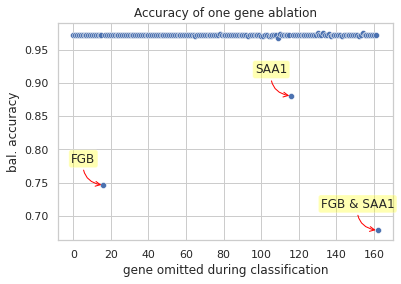

In [9]:
sns.set_theme(style='whitegrid')

sns.scatterplot(data=df, x='gene omitted during classification', y='bal. accuracy')
anno_gene_idx = [16, 116, 162]
for gene_idx in anno_gene_idx:
    plt.annotate(
        df.loc[gene_idx, 'gene omitted during classification name'],
        xy=(df.loc[gene_idx, 'gene omitted during classification'], df.loc[gene_idx, 'bal. accuracy']),
        xytext=(-20, 20),
        textcoords='offset points', 
        ha='center', 
        va='bottom',
        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='red')
    )
    
plt.title("Accuracy of one gene ablation")
plt.savefig('F3_sensitivity_one_gene_ablation.pdf')

# one gene ablation - overview table

In [8]:
import pandas as pd

In [14]:
df = pd.read_csv("../out/prediction_sensitivity_one_gene_ablation_overview.csv")

In [15]:
df

,gene omitted during classification,bal. accuracy,data set
0,FGB,0.746169,lambrechts
1,SAA1,0.880151,lambrechts
2,"['FGB', 'SAA1']",0.678333,lambrechts
3,reference (all genes),0.971621,lambrechts
4,FGB,0.998045,tirosh
5,SAA1,0.998497,tirosh
6,reference (all genes),0.998045,tirosh
7,FGB,0.997874,kildisiute_10x
8,SAA1,0.997874,kildisiute_10x
9,reference (all genes),0.997874,kildisiute_10x


# one gene ablation - umaps

In [1]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
from pathlib import Path
import anndata

def plot_confusion_matrix(
    y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues, ax=None
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.rcParams['figure.figsize'] = [6, 4]
    # print(classes)
    if not title:
        if normalize:
            title = "Normalized confusion matrix"
        else:
            title = "Confusion matrix, without normalization"

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred, labels=classes)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    if ax is None:
        (fig, ax) = plt.subplots()

    im = ax.imshow(cm, interpolation="nearest", cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes,
        yticklabels=classes,
        title=title,
        ylabel="True label",
        xlabel="Predicted label",
    )
    for item in (
        [ax.title, ax.xaxis.label, ax.yaxis.label]
        + ax.get_xticklabels()
        + ax.get_yticklabels()
    ):
        item.set_fontsize(12)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(
                j,
                i,
                format(cm[i, j], fmt),
                ha="center",
                va="center",
                color="white" if cm[i, j] > thresh else "black",
            )

    return fig, ax

In [2]:
path = Path("../out/lambrechts/")
name = "lambrechts"
gene_ablations = [
    "FGB",
    "SAA1",
    "FGB_SAA1"
]

In [18]:
df = pd.read_csv("../out/prediction_sensitivity_one_gene_ablation_lambrechts.csv")

In [19]:
df

,raw,major,tier_0,final_pred_FGB,final_pred_SAA1,final_pred_FGB_SAA1
0,CD4+ T cells,Immune,Normal,Normal,Normal,Normal
1,CD8+ T cells,Immune,Normal,Normal,Normal,Normal
2,CD8+ T cells,Immune,Normal,Normal,Normal,Normal
3,mast cells,Immune,Normal,Normal,Normal,Normal
4,CD4+ T cells,Immune,Normal,Normal,Normal,Normal
...,...,...,...,...,...,...
52693,cuboidal alveolar type 2 (AT2) cells,Epithelial,Normal,Normal,Normal,Normal
52694,mast cells,Immune,Normal,Normal,Normal,Normal
52695,macrophages,Immune,Normal,Normal,Normal,Normal
52696,mast cells,Immune,Normal,Normal,Normal,Normal


              precision    recall  f1-score   support

      Normal       0.92      1.00      0.96     45251
       Tumor       0.99      0.49      0.66      7447

    accuracy                           0.93     52698
   macro avg       0.95      0.75      0.81     52698
weighted avg       0.93      0.93      0.92     52698



/home/jdohmen/.miniconda3/envs/ikarus-test/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'final_pred_FGB_ablation' as categorical
/home/jdohmen/.miniconda3/envs/ikarus-test/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'tier_0_pred_correctness' as categorical


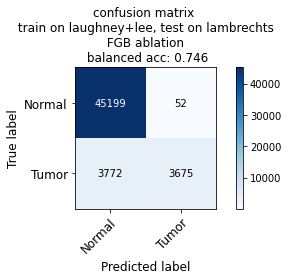

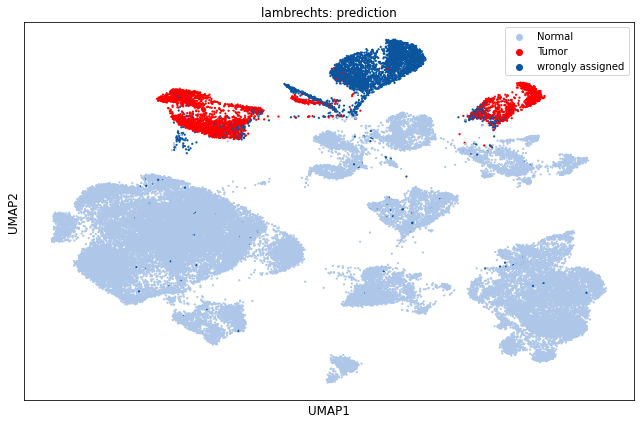

              precision    recall  f1-score   support

      Normal       0.96      1.00      0.98     45251
       Tumor       0.99      0.76      0.86      7447

    accuracy                           0.97     52698
   macro avg       0.98      0.88      0.92     52698
weighted avg       0.97      0.97      0.96     52698



/home/jdohmen/.miniconda3/envs/ikarus-test/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'final_pred_SAA1_ablation' as categorical
/home/jdohmen/.miniconda3/envs/ikarus-test/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'tier_0_pred_correctness' as categorical


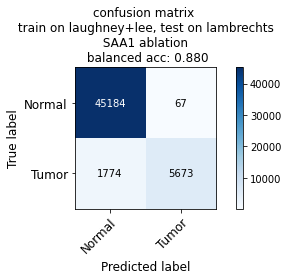

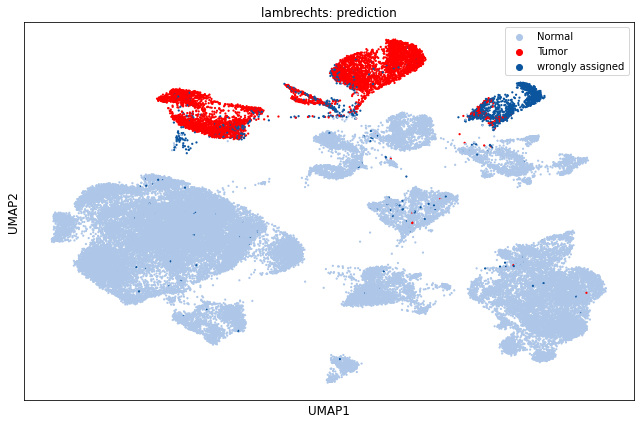

              precision    recall  f1-score   support

      Normal       0.90      1.00      0.95     45251
       Tumor       0.98      0.36      0.52      7447

    accuracy                           0.91     52698
   macro avg       0.94      0.68      0.74     52698
weighted avg       0.92      0.91      0.89     52698



/home/jdohmen/.miniconda3/envs/ikarus-test/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'final_pred_FGB_SAA1_ablation' as categorical
/home/jdohmen/.miniconda3/envs/ikarus-test/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'tier_0_pred_correctness' as categorical


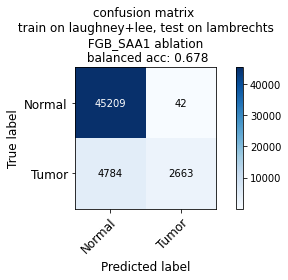

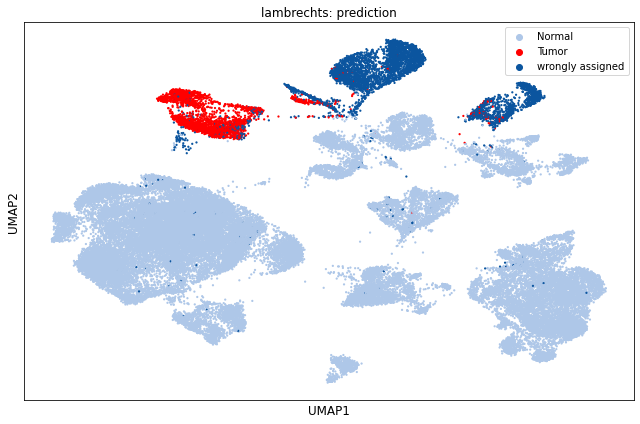

In [20]:
for gene_ablation in gene_ablations:
    results = df
    adata = anndata.read_h5ad(path / "adata_umap.h5ad")

    y = adata.obs.loc[:, 'tier_0']
    y_pred_lr = results[f'final_pred_{gene_ablation}']
    acc = metrics.balanced_accuracy_score(y, y_pred_lr)
    print(metrics.classification_report(y, y_pred_lr, labels=['Normal', 'Tumor']))
    fig, ax = plot_confusion_matrix(
        y,
        y_pred_lr,
        classes=['Normal', 'Tumor'],
        title=f'confusion matrix \n train on laughney+lee, test on {name} \n {gene_ablation} ablation \n balanced acc: {acc:.3f}',
    )
    fig.tight_layout()
    fig.savefig(f"F3_{gene_ablation}_ablation_{name}_confusion_matrix.pdf", dpi=fig.dpi)


    # umaps
    adata.obs[f"final_pred_{gene_ablation}_ablation"] = results[f'final_pred_{gene_ablation}'].values
    adata.obs.loc[:, 'tier_0_pred_correctness'] = 'wrongly assigned'
    adata.obs.loc[
        adata.obs['tier_0'] == adata.obs[f"final_pred_{gene_ablation}_ablation"],
        'tier_0_pred_correctness'
    ] = 'correctly assigned'
    adata.obs.loc[:, 'tier_0_pred_wrong'] = pd.Categorical(
        adata.obs['tier_0'].copy(),
        categories=np.array(['Normal', 'Tumor', 'wrongly assigned']),
        ordered=True
    )
    adata.obs.loc[
        adata.obs['tier_0_pred_correctness'] == 'wrongly assigned',
        'tier_0_pred_wrong'
    ] = 'wrongly assigned'

    plt.rcParams['figure.figsize'] = [9, 6]

    colors = [
        ['tier_0_pred_wrong']
        ]
    titles = [
        [f'{name}: prediction']
        ]
    palettes = [
        ['#aec7e8', '#ff0000', '#0b559f'], 
    ]

    for color, title, palette, umap_type in zip(colors, titles, palettes, ["prediction"]):

        ax = sc.pl.umap(
            adata, ncols=1, size=20, 
            color=color,
            title=title,
            wspace=0.25,
            vmax='p99',
            legend_fontsize=12,
            palette=palette,
            show=False
        )
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + 
                     ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(12)
        ax.legend(loc='best')
        plt.tight_layout()
        plt.savefig(f"F3_{gene_ablation}_ablation_{name}_{umap_type}_umaps.pdf")
        plt.show()

# Partial tumor gene list

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
df = pd.read_csv("../out/prediction_sensitivity_partial_tumor_genelist.csv")

In [13]:
df

,percentage of tumor list genes,bal. accuracy
0,100,0.971621
1,20,0.663580
2,20,0.552617
3,20,0.696553
4,20,0.764612
...,...,...
96,80,0.972793
97,80,0.974518
98,80,0.973158
99,80,0.739969


In [ ]:
# print pvals
pvals = []
percentages = [80, 60, 40, 20]
balacc_100 = df.loc[df["percentage of tumor list genes"] == 100, "bal. accuracy"].item()

for percentage in percentages:
    balaccs = df.loc[df["percentage of tumor list genes"] == percentage, "bal. accuracy"].values
    pvals.append(scipy.stats.ttest_1samp(balaccs, balacc_100, alternative="less")[1])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, method='fdr_bh')[1]
for p, pv, pva in zip(percentages, pvals, pvals_adj):
    print(f"{p}\t{pv}\t{pva}")

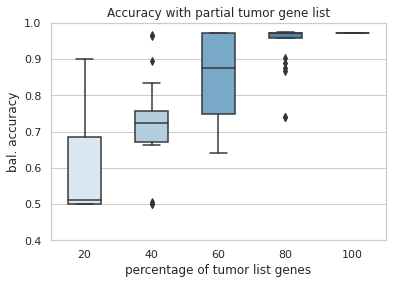

In [14]:
ax = sns.boxplot(
    data=df, 
    x='percentage of tumor list genes', 
    y='bal. accuracy', 
    palette='Blues', 
    width=0.5
)
_ = ax.set_ylim(0.4, 1.0)
_ = ax.set_title("Accuracy with partial tumor gene list", fontdict={'fontsize': 12})
ax.get_figure().savefig('F3_sensitivity_partial_tumor_genelist.pdf')